# **Unsupervised Learning**

Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

*Approach: We are going to use YellowBrick library to find the optimal numbers of clusters and visualizing them. It is as follows:*

Yellowbrick provides two visualizers to evaluate centroid based clustering, particularly K-Means clustering, that help users discover an optimal K parameter in the clustering.

Both visualizers are based on both primary techiniques for finding K optimal clusters in the dataset which are:

(i)KElbowVisualizer visualizes the clusters according to a scoring function, looking for an "elbow" in the curve.
(ii)SilhouetteVisualizer visualizes the silhouette scores of each cluster in a single model.


# Importing Relevant Libraries

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing The Dataset

In [317]:
path='/content/Iris.csv'
data=pd.read_csv('/content/Iris.csv')


# Overview Of Dataset

In [318]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



# Basic Information Of The Dataset

*Since the 'Id' column was not relevant, we removed it.*

In [319]:
data.drop(labels='Id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



# Checking for Null/NaN entries

In [320]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking For Outliers For Optimizing The Output

**Boxplots are best for visualizing outliers**

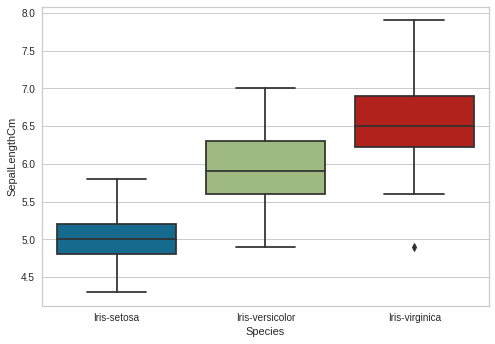

In [321]:
ax=sns.boxplot(x="Species", y="SepalLengthCm", data=data)

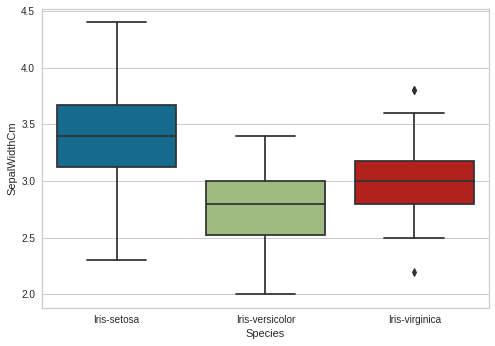

In [322]:
sns.boxplot(x="Species", y="SepalWidthCm", data=data)

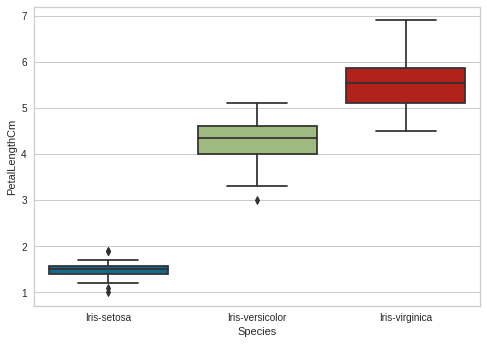

In [323]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)

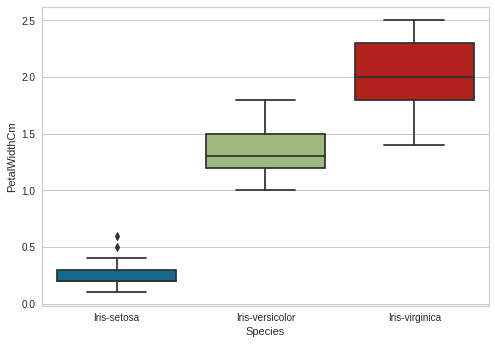

In [324]:
sns.boxplot(x="Species", y="PetalWidthCm", data=data)

**Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.**

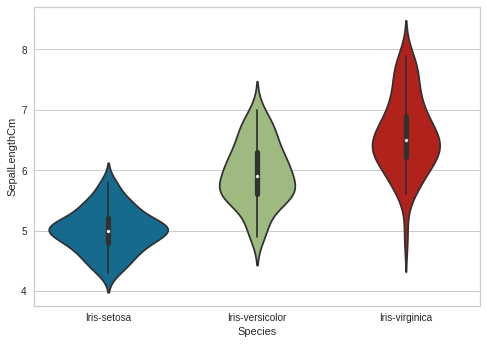

In [325]:
sns.violinplot(x="Species", y="SepalLengthCm", data=data, size=6)

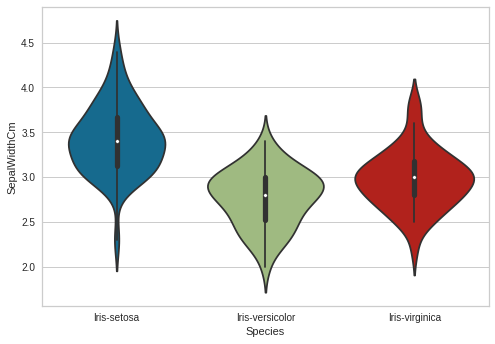

In [326]:
sns.violinplot(x="Species", y="SepalWidthCm", data=data, size=6)

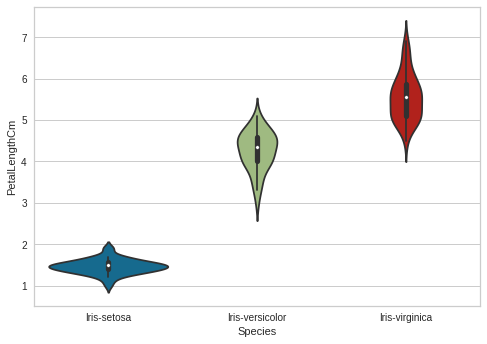

In [327]:
sns.violinplot(x="Species", y="PetalLengthCm", data=data, size=6)

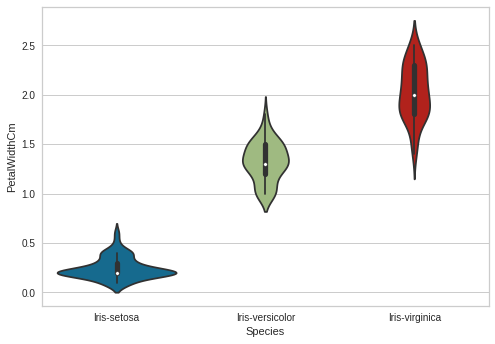

In [328]:
sns.violinplot(x="Species", y="PetalWidthCm", data=data, size=6)


# Label Encoding Species

In [329]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data['species']=encoder.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0



# Scaling The Features and Removing Outliers


*Dividing the data in ranges comes in handy in scaling*

In [330]:
data['Check_Outliers']=pd.cut(data['SepalLengthCm'],5)
data[['Check_Outliers','SepalLengthCm']].groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,SepalLengthCm
0,"(4.296, 5.02]",32
1,"(5.02, 5.74]",41
2,"(5.74, 6.46]",42
3,"(6.46, 7.18]",24
4,"(7.18, 7.9]",11


In [331]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler = scaler.fit(data[['SepalLengthCm']])
scaled_SPL = scaler.transform(data[['SepalLengthCm']])
data['Scaled SP Length']=scaled_SPL
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species,Check_Outliers,Scaled SP Length
0,5.1,3.5,1.4,0.2,Iris-setosa,0,"(5.02, 5.74]",0.222222
1,4.9,3.0,1.4,0.2,Iris-setosa,0,"(4.296, 5.02]",0.166667
2,4.7,3.2,1.3,0.2,Iris-setosa,0,"(4.296, 5.02]",0.111111
3,4.6,3.1,1.5,0.2,Iris-setosa,0,"(4.296, 5.02]",0.083333
4,5.0,3.6,1.4,0.2,Iris-setosa,0,"(4.296, 5.02]",0.194444


In [332]:
data.drop(labels='Check_Outliers',axis=1,inplace=True)
data['Check_Outliers']=pd.cut(data['Scaled SP Length'],5)
data[['Check_Outliers','Scaled SP Length']].groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,Scaled SP Length
0,"(-0.001, 0.2]",32
1,"(0.2, 0.4]",41
2,"(0.4, 0.6]",42
3,"(0.6, 0.8]",24
4,"(0.8, 1.0]",11


In [333]:
lower_bound=0.1
upper_bound=0.95

limit_to_bounds=data['SepalLengthCm'].quantile([lower_bound,upper_bound])
limit_to_bounds

0.10    4.800
0.95    7.255
Name: SepalLengthCm, dtype: float64

In [334]:
considerable_data=(data['SepalLengthCm']<limit_to_bounds.loc[upper_bound])
considerable_data.value_counts()

True     142
False      8
Name: SepalLengthCm, dtype: int64


# Final dataset without Outliers

In [335]:
final_data=data[considerable_data].copy()
final_data.shape

(142, 8)


# Checking Counts of the present Species

In [336]:
final_data.drop(labels=['Check_Outliers','Scaled SP Length'],axis=1,inplace=True)
final_data['species'].value_counts()

1    50
0    50
2    42
Name: species, dtype: int64


# Data Distribution Species-Wise

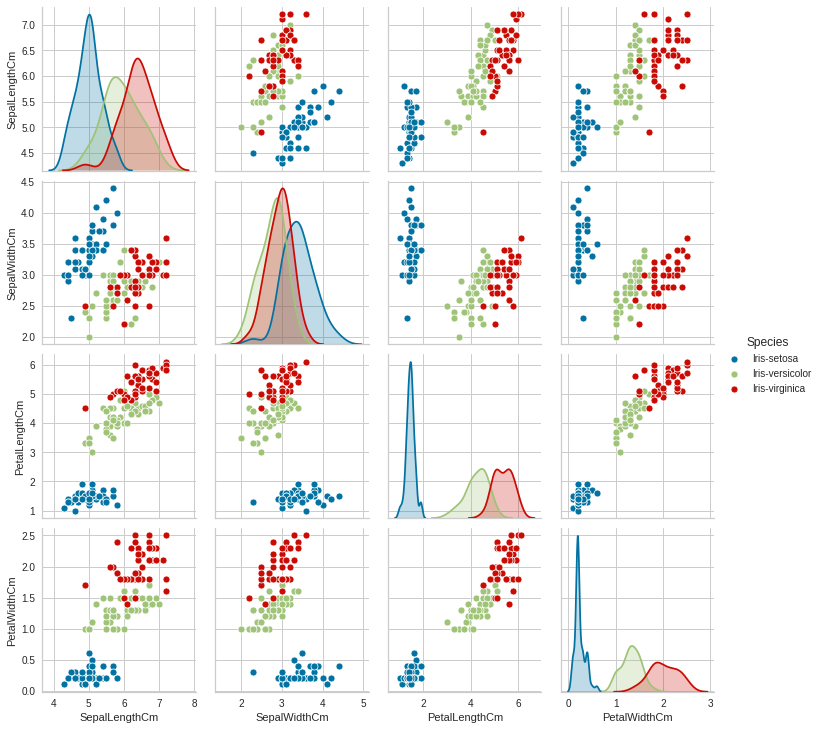

In [344]:
sns.pairplot(final_data.iloc[:,[0,1,2,3,4]],hue='Species')


# Finding value of optimal k using KElbowVisualizer


*We pass the KMeans model to KElbowVisualizer because Visualizers behave as a pipeline and we have to pass the data so it can fit and transform it.*

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fddd4107b38>,
                 k=None, metric=None, model=None, timings=True)

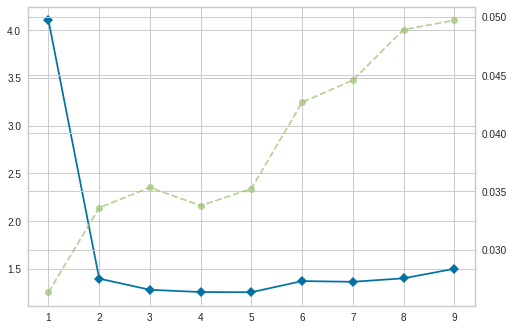

In [338]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
model1 = KMeans() 
visualizer = KElbowVisualizer(model1, k=(1,10)) 
visualizer.fit(final_data.iloc[:,[0,1,2,3]])    

*Since Elbow-like portion bends around 3, 3 is our optimal k.*


# Visualizing Silhouette Co-efficient using k=3

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fddd4d0fbe0>,
                     model=None)

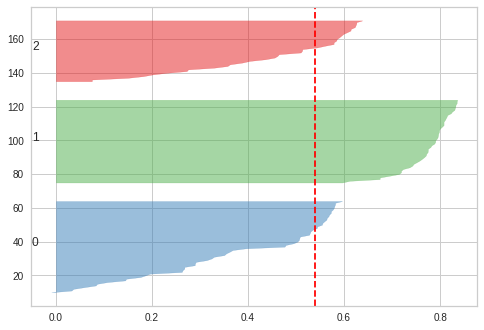

In [339]:
from yellowbrick.cluster import SilhouetteVisualizer
model2 = KMeans(3)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(final_data.iloc[:,[0,1,2,3]])    


# Finally, fixing n_clusters=3 and fitting the data to KMeans Model

In [340]:
x=final_data.iloc[:,[0,1,2,3]]
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
iris_kmeans= kmeans.fit(x)


## Visualizing The Clusters Based On First Two Columns

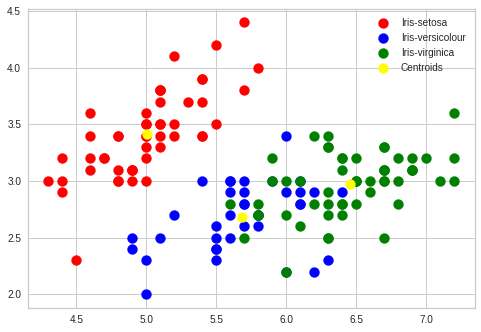

In [341]:
x = np.array(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')


plt.legend()



# Evaluating our model performance

In [342]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report

print('Confusion Matrix: \n')
print(confusion_matrix(y_kmeans,final_data.iloc[:,[5]]))
print('\nMean Absolute Error: ',mean_absolute_error(y_kmeans,final_data.iloc[:,[5]]))
print('\nAccuracy Score :',accuracy_score(y_kmeans,final_data.iloc[:,[5]]))
print('\nClassification Report:\n')
print(classification_report(y_kmeans,final_data.iloc[:,[5]]))

Confusion Matrix: 

[[50  0  0]
 [ 0 36  1]
 [ 0 14 41]]

Mean Absolute Error:  0.1056338028169014

Accuracy Score : 0.8943661971830986

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.97      0.83        37
           2       0.98      0.75      0.85        55

    accuracy                           0.89       142
   macro avg       0.90      0.91      0.89       142
weighted avg       0.92      0.89      0.90       142




# Happy Learning :)